In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import copy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [1]:
wrs = pickle.load(open("../data/wrs_career.pkl","rb"))

NameError: name 'pickle' is not defined

In [22]:
len(wrs)

641

In [23]:
value_inputs = wrs[["Rec_x","Yds_x","TD_x","Fmb","G_x"]]


value_inputs["Value"] = (value_inputs["Yds_x"] + 50 * (value_inputs["TD_x"] - 0.5 * value_inputs["Fmb"])) / (0.5 * value_inputs["G_x"])
y = value_inputs["Value"]
X = wrs.loc[:,"Rec_y":"Conf"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8, random_state=29)
X_train.fillna(12, inplace = True)
X_test.fillna(12, inplace = True)

/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


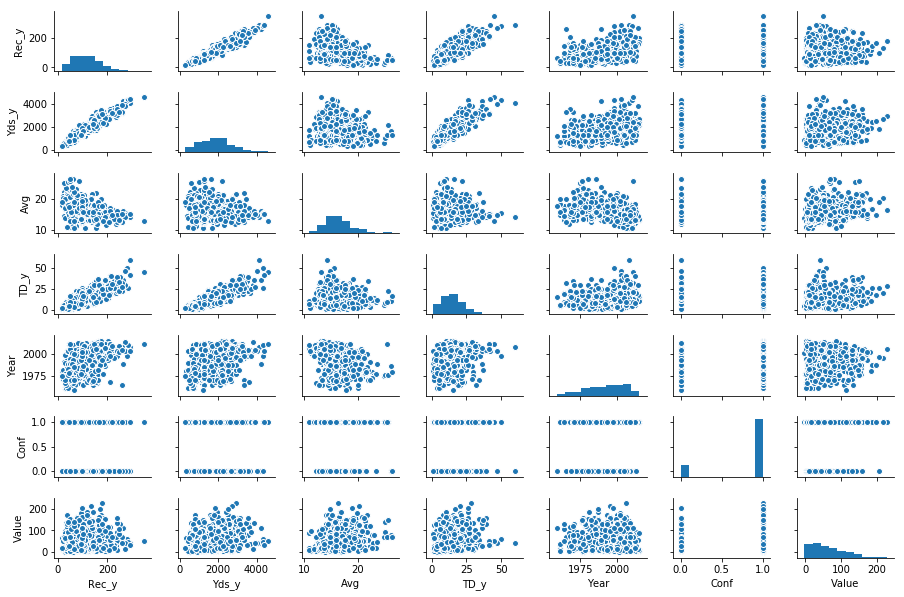

In [15]:
data = X_train.merge(pd.DataFrame(y_train), left_index = True, right_index = True)
data = data.dropna()
sns.pairplot(data, size = 1.2, aspect=1.5);

In [17]:
lm = smf.ols('Value ~ Yds_y + TD_y + Rec_y + Avg + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     12.65
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           2.54e-13
Time:                        22:42:47   Log-Likelihood:                -2655.1
No. Observations:                 513   AIC:                             5324.
Df Residuals:                     506   BIC:                             5354.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.9728    338.527     -0.024      0.981    -673.064     657.119
Conf[T.True]     9.7891      5.184      1.888      0.060      -0.396      19.974
Yds_y            0.0445      0.015      3.021      0.003       0.016       0.073
TD_y             0.6997      0.414      1.688      0.092      -0.115       1.514
Rec_y           -0.5836      0.227     -2.569      0.010      -1.030      -0.137
Avg              1.4480      1.519      0.953      0.341      -1.536       4.432
Year             0.0069      0.169      0.041      0.967      -0.325       0.339
==============================================================================
Omnibus:                       38.207   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.559
Skew:                           0.730   Prob(JB):                     1.28e-10
Kurtosis:                       2.978   Cond. No.                     4.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
lm = smf.ols('Value ~ Yds_y + TD_y + Rec_y + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     18.79
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           2.03e-14
Time:                        00:35:52   Log-Likelihood:                -2655.6
No. Observations:                 513   AIC:                             5321.
Df Residuals:                     508   BIC:                             5342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.5140      7.068      4.317      0.000      16.627      44.401
Conf[T.True]     9.2404      5.129      1.802      0.072      -0.836      19.317
Yds_y            0.0558      0.009      6.408      0.000       0.039       0.073
TD_y             0.7286      0.413      1.764      0.078      -0.083       1.540
Rec_y           -0.7711      0.111     -6.934      0.000      -0.990      -0.553
==============================================================================
Omnibus:                       37.694   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.851
Skew:                           0.724   Prob(JB):                     1.82e-10
Kurtosis:                       2.962   Cond. No.                     8.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
lm = smf.ols('Value ~ Yds_y + TD_y + Rec_y + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     18.79
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           2.03e-14
Time:                        00:39:04   Log-Likelihood:                -2655.6
No. Observations:                 513   AIC:                             5321.
Df Residuals:                     508   BIC:                             5342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.5140      7.068      4.317      0.000      16.627      44.401
Conf[T.True]     9.2404      5.129      1.802      0.072      -0.836      19.317
Yds_y            0.0558      0.009      6.408      0.000       0.039       0.073
TD_y             0.7286      0.413      1.764      0.078      -0.083       1.540
Rec_y           -0.7711      0.111     -6.934      0.000      -0.990      -0.553
==============================================================================
Omnibus:                       37.694   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.851
Skew:                           0.724   Prob(JB):                     1.82e-10
Kurtosis:                       2.962   Cond. No.                     8.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
lm = smf.ols('Value ~ Yds_y + Rec_y + TD_y + Conf + Rec_y*TD_y', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     15.36
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           4.53e-14
Time:                        00:39:38   Log-Likelihood:                -2654.8
No. Observations:                 513   AIC:                             5322.
Df Residuals:                     507   BIC:                             5347.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.5141      8.561      2.863      0.004       7.694      41.334
Conf[T.True]     8.9143      5.133      1.737      0.083      -1.170      18.999
Yds_y            0.0530      0.009      5.890      0.000       0.035       0.071
Rec_y           -0.6854      0.131     -5.238      0.000      -0.942      -0.428
TD_y             1.3387      0.642      2.085      0.038       0.077       2.600
Rec_y:TD_y      -0.0036      0.003     -1.241      0.215      -0.009       0.002
==============================================================================
Omnibus:                       37.389   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.431
Skew:                           0.720   Prob(JB):                     2.25e-10
Kurtosis:                       2.949   Cond. No.                     1.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Create an empty model
lr = LinearRegression()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1832.5638127776888
1968.0451980929502


In [51]:
X2 = X_train[["Yds_y", "Rec_y", "Conf", "TD_y"]]
X2["int"] = 1
lr = LinearRegression()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf", "TD_y"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1835.8674067921145
1966.198820918316


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [37]:
lr = Lasso()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1840.8670235869308
1969.2812146739177


In [38]:
lr = Ridge()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1832.56646570058
1968.0077053193158


In [39]:
lr = ElasticNet()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1842.7550730414619
1971.3458999539032


In [45]:
X2 = X_train[["Yds_y", "Rec_y", "Conf", "TD_y"]]
X2["int"] = 1
lr = Lasso()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf", "TD_y"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1843.212793097123
1968.626438028577


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [46]:
X2 = X_train[["Yds_y", "Rec_y", "Conf"]]
X2["int"] = 1
lr = Lasso()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1854.3928282367954
1982.100642619118


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
